In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path2017 =  'vgsales_2017.csv'
path2016 = 'vgsales_2016.csv'
path2019_short = 'vgsales_2019_short.csv'
path2019 = 'vgsales_2019.csv'

In [3]:
df = pd.read_csv(path2017)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
df = df.dropna(subset = ['Year'])
df = df.dropna(subset = ['Publisher'])
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [7]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
#remove decimal points on "Year" colume
df.loc[:,['Year']]=df.loc[:,['Year']].astype(int)
print(df)

        Rank                                              Name Platform  Year  \
0          1                                        Wii Sports      Wii  2006   
1          2                                 Super Mario Bros.      NES  1985   
2          3                                    Mario Kart Wii      Wii  2008   
3          4                                 Wii Sports Resort      Wii  2009   
4          5                          Pokemon Red/Pokemon Blue       GB  1996   
...      ...                                               ...      ...   ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16594  16597                     Men in Black II: Alien Escape       GC  2003   
16595  16598  SCORE International Baja 1000: The Official Game      PS2  2008   
16596  16599                                        Know How 2       DS  2010   
16597  16600                                  Spirits & Spells      GBA  2003   

              Genre   Publi

In [9]:
gamedata = pd.read_csv(path2019)

In [10]:

gamedata['Total_Shipped'] = gamedata['Total_Shipped'].fillna(gamedata['Global_Sales'])
gamedata = gamedata.fillna(0)

gamedata = gamedata[gamedata['Total_Shipped'] != 0]

In [11]:
sportsGames_Data = gamedata.where(gamedata["Genre"] == 'Sports').dropna()
racingGames_Data = gamedata.where(gamedata["Genre"] == 'Racing').dropna()
sportsGames_Data["Total_Shipped"]

0        82.86
4        33.09
16       22.67
17       21.13
68       11.80
         ...  
19700     0.01
19732     0.01
19765     0.01
19810     0.01
19835     0.01
Name: Total_Shipped, Length: 2558, dtype: float64

In [12]:
sportsGames_TotalShipped = sportsGames_Data.sum(numeric_only=True)['Total_Shipped']
racingGames_TotalShipped = racingGames_Data.sum(numeric_only=True)['Total_Shipped']

In [13]:
print('Total number of sales in Sports Genre: ', sportsGames_TotalShipped)
print('Total number of sales in Racing Genre: ', racingGames_TotalShipped)

Total number of sales in Sports Genre:  1464.1
Total number of sales in Racing Genre:  806.6399999999999


In [14]:
sportsGames_YearlyData = sportsGames_Data.groupby('Year').sum()[1:]
racingGames_YearlyData = racingGames_Data.groupby('Year').sum()[1:]

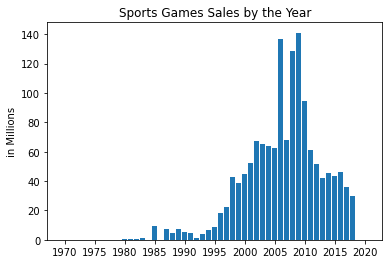

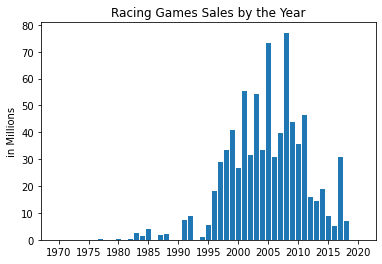

In [15]:
plt.bar(sportsGames_YearlyData.index.tolist(), sportsGames_YearlyData['Total_Shipped'].tolist(), width=0.8)
plt.xticks(np.arange(min(sportsGames_YearlyData.index.tolist()), max(sportsGames_YearlyData.index.tolist())+1, 5))
plt.title('Sports Games Sales by the Year')
plt.ylabel('in Millions')
plt.show()

plt.bar(racingGames_YearlyData.index.tolist(), racingGames_YearlyData['Total_Shipped'].tolist(), width=0.8)
plt.xticks(np.arange(min(racingGames_YearlyData.index.tolist()), max(racingGames_YearlyData.index.tolist())+1, 5))
plt.ylabel('in Millions')
plt.title('Racing Games Sales by the Year')
plt.show()

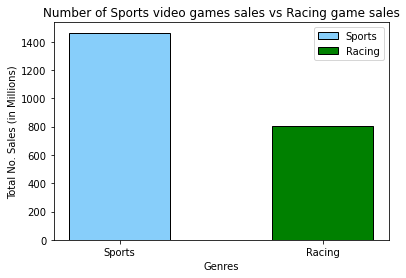

In [16]:

plt.bar(0+0.3, sportsGames_TotalShipped, color = 'lightskyblue',
        width = 0.2, edgecolor = 'black',
        label='Sports')
plt.bar(1-0.3, racingGames_TotalShipped, color = 'g',
        width = 0.2, edgecolor = 'black',
        label='Racing')

plt.xlabel("Genres")
plt.ylabel("Total No. Sales (in Millions)")
plt.title("Number of Sports video games sales vs Racing game sales")
  
# plt.grid(linestyle='--')
plt.xticks( [0+0.3,1-0.3], ['Sports','Racing'])
plt.legend()
  
plt.show()

In [17]:
# read csv 
df= pd.read_csv(path2016)
sales = df.dropna(subset=['Name','Year_of_Release','Genre','Publisher'])
scores = df.dropna()

In [18]:
#export cleaned datasets to csv
sales.to_csv('vgsales2016.csv', index=False)
scores.to_csv('vgscores2016.csv',index=False)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10072/3664703768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["User_Score"] = scores["User_Score"].astype('float')


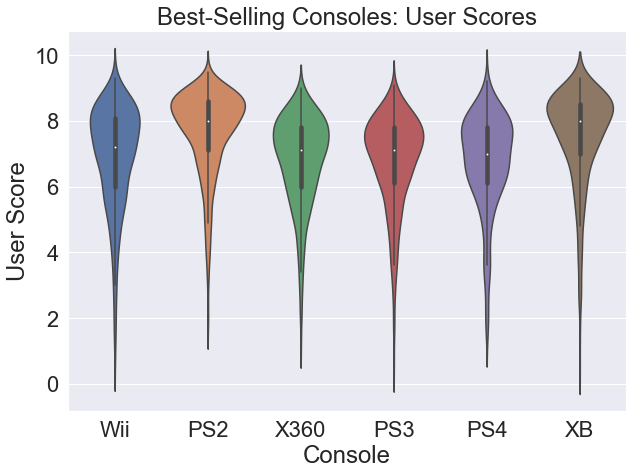

In [19]:
plt.figure(figsize=(10,7))  
sns.set(font_scale=2)
scores["User_Score"] = scores["User_Score"].astype('float')
ax = sns.violinplot(x='Platform', y='User_Score', data=scores, order=['Wii','PS2','X360','PS3','PS4','XB'])
ax.set(xlabel='Console', ylabel='User Score', title='Best-Selling Consoles: User Scores')
plt.show()


In [20]:
df2= pd.read_csv('vgsales_2017.csv')
df2.isnull().sum()
scores2 = df2.dropna(subset=['Year','Publisher'])
scores2.isnull().sum()
#export cleaned datasets to csv
scores2.to_csv('vgscores2017.csv',index=False)


C:\Users\ASUS\AppData\Local\Temp/ipykernel_10072/3097605455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores2["User_Score"] = scores["User_Score"].astype('float')


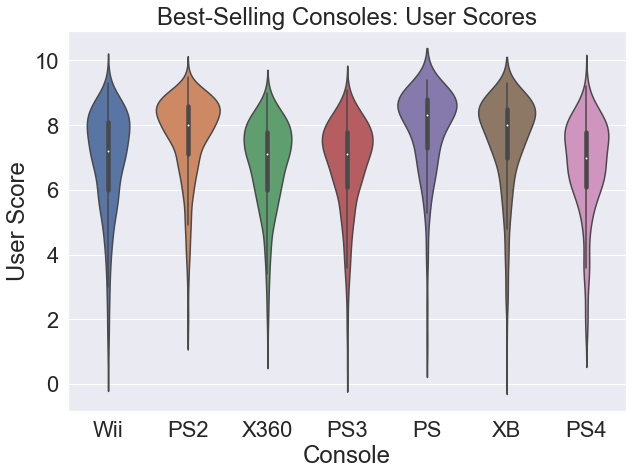

In [21]:
plt.figure(figsize=(10,7))  
sns.set(font_scale=2)
scores2["User_Score"] = scores["User_Score"].astype('float')
ax = sns.violinplot(x='Platform', y='User_Score', data=scores, order=['Wii','PS2','X360','PS3','PS','XB','PS4'])
ax.set(xlabel='Console', ylabel='User Score', title='Best-Selling Consoles: User Scores')
plt.show()


In [23]:
df3= pd.read_csv(path2019_short)
df3.rename(columns={"PAL_Sales":"EU_Sales"},inplace=True)
df3.isnull().sum()
df3.drop('Total_Shipped', axis=1, inplace=True)
scores3= df3.dropna(subset= ['Global_Sales'])
scores3.isnull().sum()
scores3.to_csv('vgscores2019.csv',index=False)